In [52]:
!wget http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz \
  && sudo tar -xzf ta-lib-0.4.0-src.tar.gz \
  && sudo rm ta-lib-0.4.0-src.tar.gz \
  && cd ta-lib/ \
  && sudo ./configure --prefix=/usr \
  && sudo make \
  && sudo make install \
  && cd ~ \
  && sudo rm -rf ta-lib/ \
  && pip install ta-lib

--2022-12-03 13:00:56--  http://prdownloads.sourceforge.net/ta-lib/ta-lib-0.4.0-src.tar.gz
Resolving prdownloads.sourceforge.net (prdownloads.sourceforge.net)... 204.68.111.105
Connecting to prdownloads.sourceforge.net (prdownloads.sourceforge.net)|204.68.111.105|:80... connected.
HTTP request sent, awaiting response... 301 Moved Permanently
Location: http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2022-12-03 13:00:56--  http://downloads.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving downloads.sourceforge.net (downloads.sourceforge.net)... 204.68.111.105
Reusing existing connection to prdownloads.sourceforge.net:80.
HTTP request sent, awaiting response... 302 Found
Location: http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz [following]
--2022-12-03 13:00:56--  http://cfhcable.dl.sourceforge.net/project/ta-lib/ta-lib/0.4.0/ta-lib-0.4.0-src.tar.gz
Resolving cfhcable.dl.s

In [53]:
!pip install yfinance

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [54]:
import talib as ta
import yfinance as yf


import matplotlib.pyplot as plt 
import plotly.graph_objects as go
import numpy as np
import pandas as pd


In [55]:
df = yf.download('RELIANCE.NS',start='2021-12-1',end='2022-12-2',interval = "1h")
df.tail(5)


[*********************100%***********************]  1 of 1 completed


,Open,High,Low,Close,Adj Close,Volume
2022-12-01 11:15:00,2743.050049,2749.500000,2741.000000,2749.300049,2749.300049,329602
2022-12-01 12:15:00,2749.000000,2752.699951,2745.000000,2746.699951,2746.699951,340669
2022-12-01 13:15:00,2746.750000,2747.750000,2734.199951,2740.399902,2740.399902,529867
2022-12-01 14:15:00,2741.000000,2743.550049,2716.199951,2722.100098,2722.100098,882088
2022-12-01 15:15:00,2722.149902,2726.850098,2720.399902,2725.550049,2725.550049,398576


In [56]:
df['MA'] = ta.SMA(df['Close'], timeperiod = 20)
df['upper_band'], df['middle_band'], df['lower_band'] = ta.BBANDS(df['Close'], timeperiod =20)
df['RSI'] = ta.RSI(df['Close'],6) 
df.tail(5)

,Open,High,Low,Close,Adj Close,Volume,MA,upper_band,middle_band,lower_band,RSI
2022-12-01 11:15:00,2743.050049,2749.500000,2741.000000,2749.300049,2749.300049,329602,2723.167493,2751.664767,2723.167493,2694.670218,71.316664
2022-12-01 12:15:00,2749.000000,2752.699951,2745.000000,2746.699951,2746.699951,340669,2725.374988,2753.981666,2725.374988,2696.768310,66.799724
2022-12-01 13:15:00,2746.750000,2747.750000,2734.199951,2740.399902,2740.399902,529867,2727.072485,2755.006949,2727.072485,2699.138022,56.411195
2022-12-01 14:15:00,2741.000000,2743.550049,2716.199951,2722.100098,2722.100098,882088,2727.877490,2754.219038,2727.877490,2701.535943,36.581244
2022-12-01 15:15:00,2722.149902,2726.850098,2720.399902,2725.550049,2725.550049,398576,2728.842493,2753.290109,2728.842493,2704.394877,41.253096


In [57]:
conditions = [(df['RSI']<30)&(df['Close']<df['lower_band']),(df['RSI']>70)&(df['Close']>df['upper_band'])]
choices = ['Buy','Sell']
df['Signal'] = np.select(conditions,choices)
df.dropna(inplace=True)
df.head(5)

,Open,High,Low,Close,Adj Close,Volume,MA,upper_band,middle_band,lower_band,RSI,Signal
2021-12-03 14:15:00,2423.449951,2425.000000,2400.000000,2407.949951,2407.949951,2387574,2458.612512,2503.102884,2458.612512,2414.122141,14.327636,Buy
2021-12-03 15:15:00,2407.949951,2414.800049,2403.550049,2413.149902,2413.149902,1002202,2457.537512,2505.216639,2457.537512,2409.858386,22.018081,0
2021-12-06 09:15:00,2416.500000,2425.000000,2391.500000,2394.100098,2394.100098,0,2454.657520,2509.777093,2454.657520,2399.537946,15.787828,Buy
2021-12-06 10:15:00,2394.949951,2403.750000,2383.100098,2393.699951,2393.699951,931583,2452.227515,2513.278078,2452.227515,2391.176951,15.676021,0
2021-12-06 11:15:00,2393.100098,2397.149902,2387.000000,2390.949951,2390.949951,245000,2449.370007,2516.019019,2449.370007,2382.720996,14.810996,0


In [58]:
df['Date']=df.index

df = df.reset_index(drop=True)
df.index

RangeIndex(start=0, stop=1725, step=1)

In [59]:
# We generally Buy/Sell on next day open once we identify a pattern
df['Signal'] = df['Signal'].shift(1)
df['Shifted Close'] = df['Close'].shift(1)

In [60]:
#from datetime import datetime


position = False
buy_day,sell_day,buy_price,sell_price = [],[],[],[]

for idx,row in df.iterrows():
  #idx = idx.strftime("%Y-%m-%d")

  if not position and row['Signal']=='Buy':
    buy_day.append(idx)
    buy_price.append(row['Open']) # buy at next day open
    position=True
  if position:
    stop_loss = row['Shifted Close'] < 0.95 * buy_price[-1]
    if row['Signal']=='Sell' or stop_loss:
      sell_day.append(idx)
      sell_price.append(row['Open'])
      position=False

revenue = pd.Series([(sell-buy)/buy for sell,buy in zip(sell_price,buy_price)])
cumulated_revenue = (revenue + 1).prod()

In [61]:
revenue = pd.Series([(sell-buy)/buy for sell,buy in zip(sell_price,buy_price)])
revenue

0     0.016736
1    -0.003278
2     0.021926
3     0.026364
4    -0.065159
5     0.011155
6     0.022601
7    -0.059457
8     0.043023
9     0.036262
10    0.002291
11    0.044829
12   -0.065046
13   -0.057040
14    0.069307
15    0.033352
16    0.022070
17   -0.051269
18    0.036102
19   -0.000413
20    0.014687
21    0.029198
22   -0.011019
23   -0.050761
24    0.011859
25    0.004969
26    0.041393
27    0.014132
28    0.002821
dtype: float64

In [62]:
cumulated_revenue = (revenue + 1).prod()       # so we made this much profit
cumulated_revenue

1.1298654741737224

In [63]:
df.iloc[buy_day]['Close']

1       2413.149902
41      2408.500000
67      2340.500000
133     2355.750000
234     2480.500000
304     2341.000000
346     2338.500000
381     2413.750000
444     2254.199951
490     2363.000000
591     2606.850098
671     2676.000000
711     2714.600098
732     2539.399902
792     2477.000000
823     2560.449951
886     2747.000000
906     2659.300049
965     2456.800049
1004    2457.000000
1116    2410.050049
1174    2556.899902
1237    2621.000000
1362    2563.500000
1410    2402.649902
1473    2394.300049
1508    2367.000000
1541    2470.000000
1614    2582.000000
Name: Close, dtype: float64

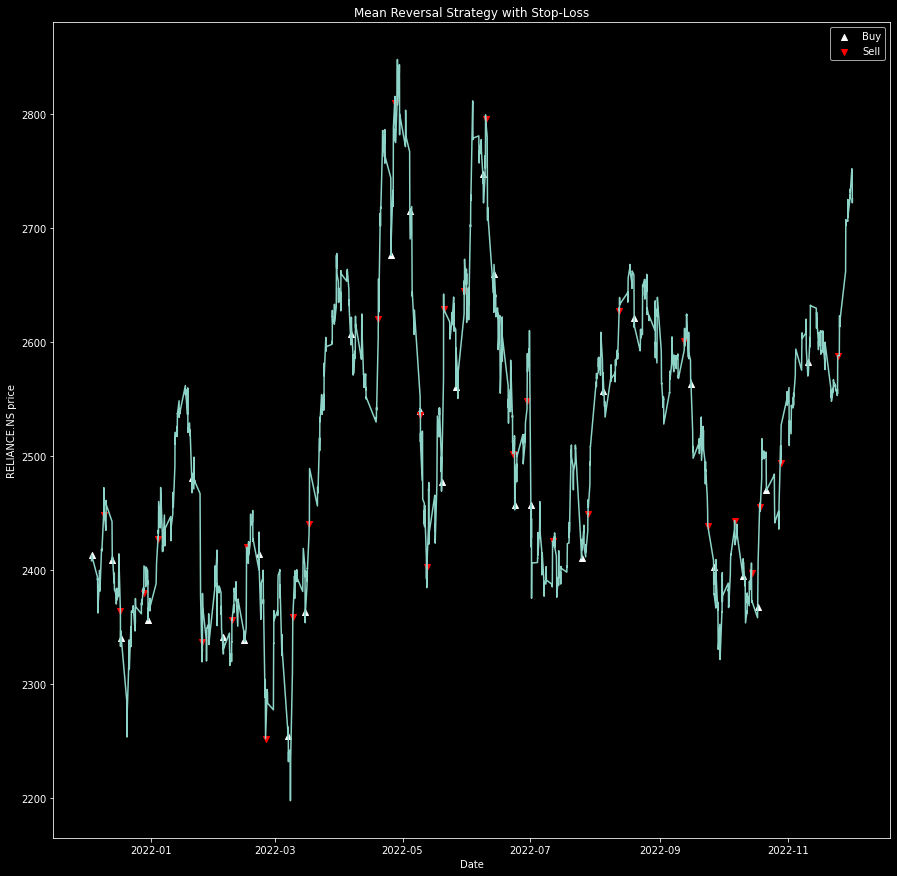

In [64]:
plt.figure(figsize=(15,15))
plt.style.use('dark_background')

buy_sig = plt.scatter(df.iloc[buy_day]['Date'],df.iloc[buy_day]['Close'],marker='^',color='w')
sell_sig = plt.scatter(df.iloc[sell_day]['Date'],df.iloc[sell_day]['Close'],marker='v',color='r')

df['Datetime'] = pd.to_datetime(df['Date'],format='%Y-%m-%d')
df = df.set_index('Datetime')

plt.plot(df['Close'])
plt.xlabel('Date')
plt.ylabel('RELIANCE.NS price')
plt.title('Mean Reversal Strategy with Stop-Loss')
plt.legend([buy_sig,sell_sig],['Buy','Sell'])
plt.show()

In [65]:
import plotly.graph_objects as go

#fig = go.Figure(data=[go.Candlestick(x=df.index, open=df['Open'], high=df['High'],low=df['Low'], close=df['Close'])])

fig = go.Figure(go.Scatter(x=df.index,y=df['Close']))

fig.update_layout(title='Mean Reversal Strategy with Stop-Loss',yaxis_title='RELIANCE.NS Stock')

fig.add_scatter(x=df.iloc[buy_day]['Date'],y=df.iloc[buy_day]['Close'],mode='markers',
                marker=dict(size=5,color='#bcbd22'),name='Buy')

fig.add_scatter(x=df.iloc[sell_day]['Date'],y=df.iloc[sell_day]['Close'],mode='markers',
                marker=dict(size=5,color='#d62728'),name='Sell')

fig.show()


     